RUMUS BMI = BERAT / TINGGI^2

Gender : Male / Female
Height : Number (cm)
Weight : Number (Kg)
Index :
0 - Extremely Weak
1 - Weak
2 - Normal
3 - Overweight
4 - Obesity
5 - Extreme Obesity

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("bmi_train.csv")
df

,Gender,Height,Weight,Index
0,Male,161,89,4
1,Male,179,127,4
2,Male,172,139,5
3,Male,153,104,5
4,Male,165,68,2
...,...,...,...,...
395,Male,166,160,5
396,Male,145,130,5
397,Male,178,138,5
398,Male,168,158,5


In [3]:
df['Gender'].value_counts()

Gender
Male      200
Female    200
Name: count, dtype: int64

In [4]:
df['Index'].value_counts()

Index
5    159
4    100
3     60
2     51
1     18
0     12
Name: count, dtype: int64

In [5]:
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}") #melihat jumlah kolom dan baris
print(f"Duplicates: {df.duplicated().sum()}") #melihat data duplikat
print(f"missing data: {sum(df.isna().sum())}") #melihat data missing / lost

Rows: 400, Columns: 4
Duplicates: 8
missing data: 0


In [6]:
df.drop_duplicates(keep= 'first',inplace = True) #menghapus data duplikat

In [7]:
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}") #melihat jumlah kolom dan baris
print(f"Duplicates: {df.duplicated().sum()}") #melihat data duplikat
print(f"missing data: {sum(df.isna().sum())}") #melihat data missing / lost

Rows: 392, Columns: 4
Duplicates: 0
missing data: 0


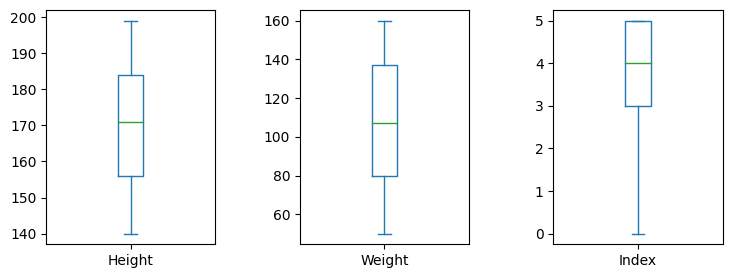

In [8]:
df.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14))
plt.subplots_adjust(wspace=0.5); 
plt.show()


In [9]:
Kondisi = [
    (df['Index'] == 0), 
    (df['Index'] == 1),
    (df['Index'] == 2),
    (df['Index'] == 3),
    (df['Index'] == 4),
    (df['Index'] == 5)
]

value = ['Extremely Weak','Weak','Normal','Overweight','Obesity','Extreme Obesity']

df['Kelas'] = np.select(Kondisi, value)
df



,Gender,Height,Weight,Index,Kelas
0,Male,161,89,4,Obesity
1,Male,179,127,4,Obesity
2,Male,172,139,5,Extreme Obesity
3,Male,153,104,5,Extreme Obesity
4,Male,165,68,2,Normal
...,...,...,...,...,...
395,Male,166,160,5,Extreme Obesity
396,Male,145,130,5,Extreme Obesity
397,Male,178,138,5,Extreme Obesity
398,Male,168,158,5,Extreme Obesity


In [10]:
print (df['Index'].value_counts())
print(40*'==')
print (df['Kelas'].value_counts())

Index
5    157
4     98
3     56
2     51
1     18
0     12
Name: count, dtype: int64
Kelas
Extreme Obesity    157
Obesity             98
Overweight          56
Normal              51
Weak                18
Extremely Weak      12
Name: count, dtype: int64


In [11]:
df["BMI Score"] = df["Weight"]/(df["Height"]/100)**2
df

,Gender,Height,Weight,Index,Kelas,BMI Score
0,Male,161,89,4,Obesity,34.335095
1,Male,179,127,4,Obesity,39.636715
2,Male,172,139,5,Extreme Obesity,46.984857
3,Male,153,104,5,Extreme Obesity,44.427357
4,Male,165,68,2,Normal,24.977043
...,...,...,...,...,...,...
395,Male,166,160,5,Extreme Obesity,58.063580
396,Male,145,130,5,Extreme Obesity,61.831153
397,Male,178,138,5,Extreme Obesity,43.555107
398,Male,168,158,5,Extreme Obesity,55.980726


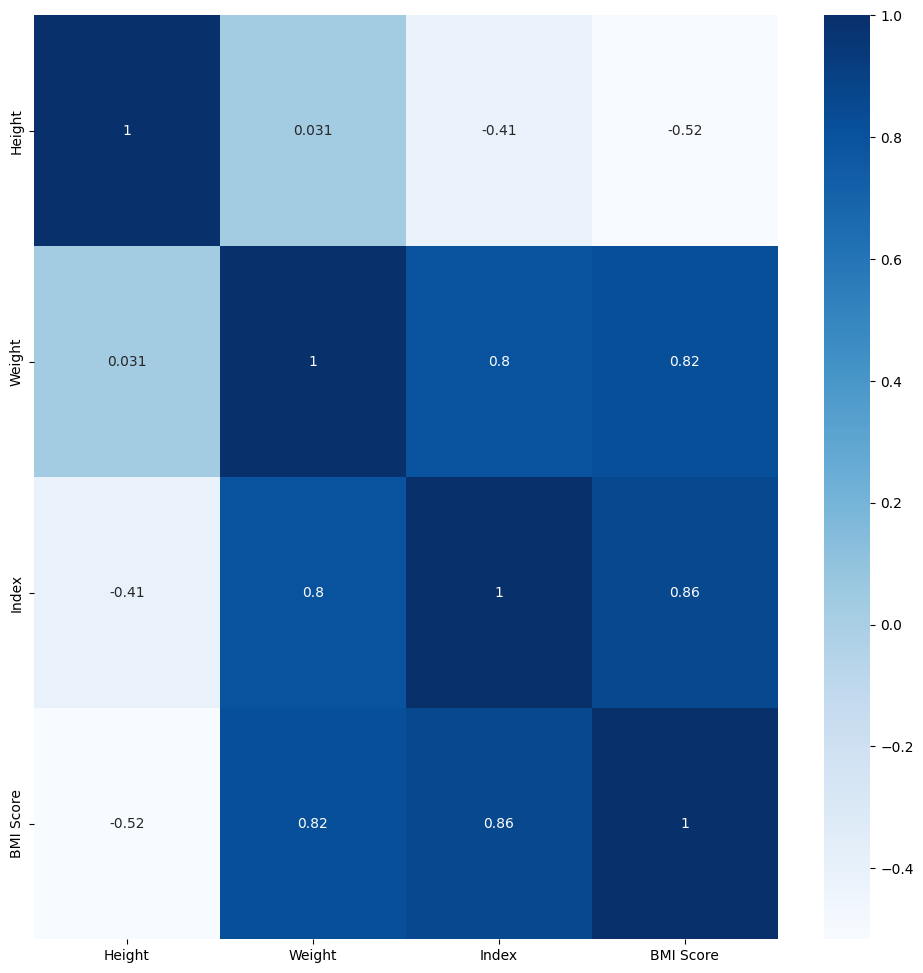

In [12]:
#melihat korelasi secara manual
correlation = df[['Height','Weight','Index','BMI Score']].corr()
plt.figure(figsize = (12,12))
sns.heatmap(correlation, annot = True, cmap = 'Blues' )
plt.show()

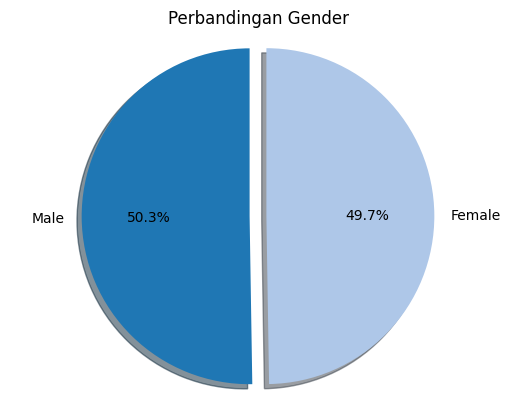

Gender
Male      197
Female    195
Name: count, dtype: int64


In [13]:
df_pie = df['Gender'].value_counts()

labels = df_pie.index
quantity = df_pie.values
colors = plt.cm.tab20(range(len(labels)))
explode = (0,0.1)

plt.title('Perbandingan Gender')
plt.pie(quantity, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90, explode = explode)

plt.axis('equal')
plt.show()

print(df['Gender'].value_counts())


c:\Users\DEDEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DEDEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DEDEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='count', ylabel='Index'>

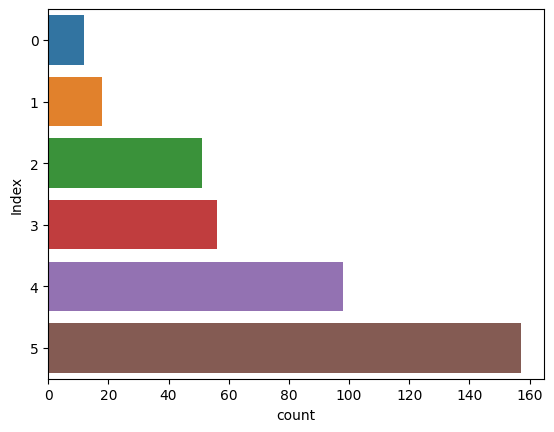

In [14]:
sns.countplot( y = df['Index'])

c:\Users\DEDEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DEDEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DEDEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


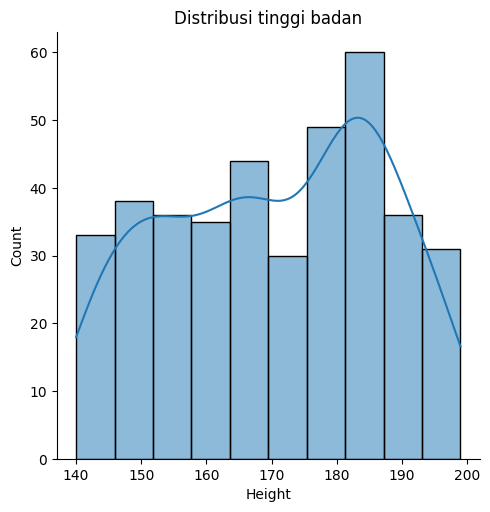

In [15]:
sns.displot ( x = 'Height', kde = True, data = df)
plt.title("Distribusi tinggi badan")
plt.show()


c:\Users\DEDEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


c:\Users\DEDEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DEDEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


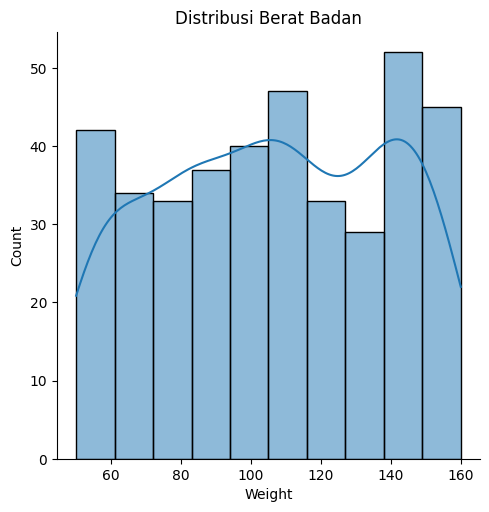

In [16]:
sns.displot ( x = 'Weight', kde = True, data = df)
plt.title("Distribusi Berat Badan")
plt.show()


c:\Users\DEDEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


c:\Users\DEDEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DEDEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


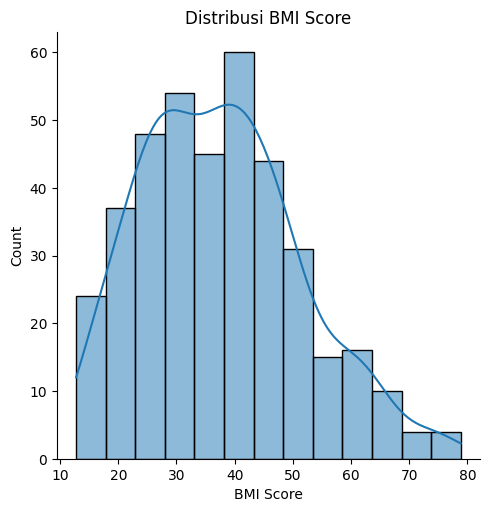

In [17]:
sns.displot ( x = 'BMI Score', kde = True, data = df)
plt.title("Distribusi BMI Score")
plt.show()


In [18]:
df

,Gender,Height,Weight,Index,Kelas,BMI Score
0,Male,161,89,4,Obesity,34.335095
1,Male,179,127,4,Obesity,39.636715
2,Male,172,139,5,Extreme Obesity,46.984857
3,Male,153,104,5,Extreme Obesity,44.427357
4,Male,165,68,2,Normal,24.977043
...,...,...,...,...,...,...
395,Male,166,160,5,Extreme Obesity,58.063580
396,Male,145,130,5,Extreme Obesity,61.831153
397,Male,178,138,5,Extreme Obesity,43.555107
398,Male,168,158,5,Extreme Obesity,55.980726


In [19]:
df = df.drop(['Kelas'], axis = 1)
df

,Gender,Height,Weight,Index,BMI Score
0,Male,161,89,4,34.335095
1,Male,179,127,4,39.636715
2,Male,172,139,5,46.984857
3,Male,153,104,5,44.427357
4,Male,165,68,2,24.977043
...,...,...,...,...,...
395,Male,166,160,5,58.063580
396,Male,145,130,5,61.831153
397,Male,178,138,5,43.555107
398,Male,168,158,5,55.980726


In [20]:
#label encoder manual 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
mapping = {'Male': 0, 'Female': 1}

df['Gender'] = le.fit_transform(df['Gender'].map(mapping))
df



,Gender,Height,Weight,Index,BMI Score
0,0,161,89,4,34.335095
1,0,179,127,4,39.636715
2,0,172,139,5,46.984857
3,0,153,104,5,44.427357
4,0,165,68,2,24.977043
...,...,...,...,...,...
395,0,166,160,5,58.063580
396,0,145,130,5,61.831153
397,0,178,138,5,43.555107
398,0,168,158,5,55.980726


In [21]:
df['Gender'].value_counts()

Gender
0    197
1    195
Name: count, dtype: int64

In [22]:
df = df[['Gender','Height','Weight','BMI Score','Index']]
df

,Gender,Height,Weight,BMI Score,Index
0,0,161,89,34.335095,4
1,0,179,127,39.636715,4
2,0,172,139,46.984857,5
3,0,153,104,44.427357,5
4,0,165,68,24.977043,2
...,...,...,...,...,...
395,0,166,160,58.063580,5
396,0,145,130,61.831153,5
397,0,178,138,43.555107,5
398,0,168,158,55.980726,5


LEARNING

In [23]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
from sklearn import tree
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2)

In [24]:
kolom=len(df.columns)
import scipy
from scipy import stats

z=[]
for i in range (0,kolom-1):
  k,y=stats.pearsonr(df.iloc[:,i],df.iloc[:,-1])
  z.append([i,df.columns[i], abs(k)])

z=sorted(z, key=lambda z:z[2], reverse=True)
z=pd.DataFrame(z,columns=["KolomKe","Nama Kolom","KoefisienKorelasi-Pearson"])
z

,KolomKe,Nama Kolom,KoefisienKorelasi-Pearson
0,3,BMI Score,0.858263
1,2,Weight,0.804458
2,1,Height,0.405859
3,0,Gender,0.062083


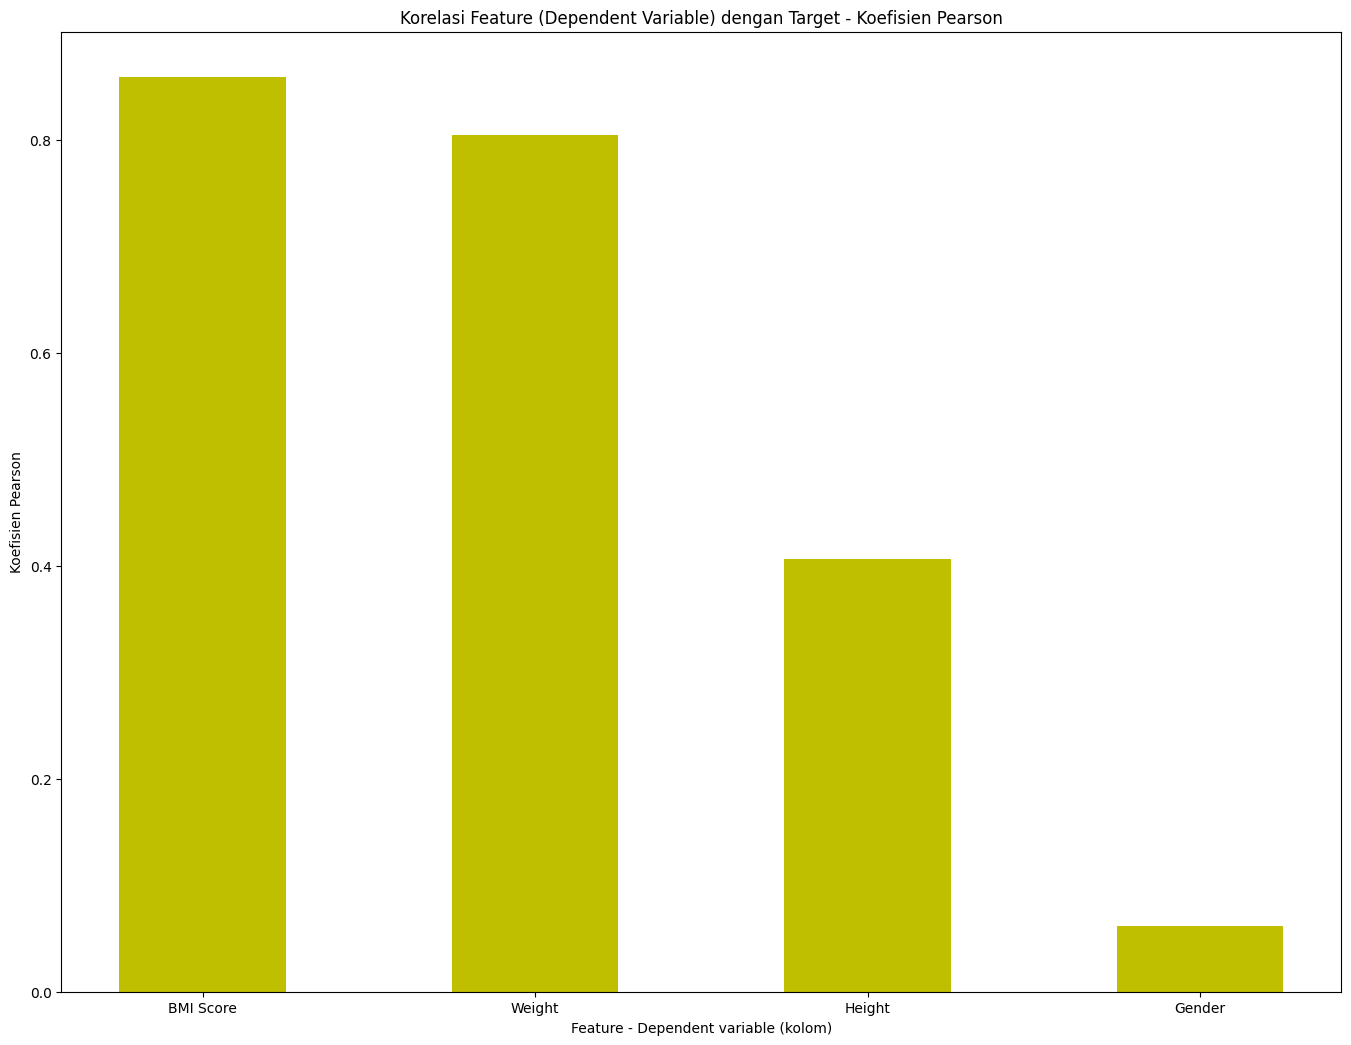

In [25]:
import matplotlib.pyplot as plt
g=z.head(5)
fig = plt.figure()

ax = fig.add_axes([1,1, 2, 2])
x_axis = g.iloc[:,1]
y_axis = g.iloc[:,2]

ax.bar(x_axis , y_axis, color = 'y', width = 0.5)

plt.title('Korelasi Feature (Dependent Variable) dengan Target - Koefisien Pearson')

plt.xlabel('Feature - Dependent variable (kolom)')
plt.ylabel('Koefisien Pearson')
plt.show()

In [26]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
from sklearn import tree
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2)

RANDOM FOREST

In [27]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 25, random_state=2)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=25, random_state=2)

In [28]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=7, shuffle=True)

In [29]:
scores1 = cross_val_score(model, x, y, cv=kf)
print(scores1)
print('rata rata KFold nya adalah: ',scores1.mean())

[0.94642857 0.96428571 0.91071429 0.94642857 0.98214286 0.98214286
 0.96428571]
rata rata KFold nya adalah:  0.9566326530612244


In [30]:
prediksi_model = model.predict(x_test)
prediksi_model

array([5, 4, 4, 5, 5, 3, 0, 1, 3, 5, 5, 5, 5, 3, 2, 5, 2, 4, 1, 5, 4, 2,
       2, 4, 4, 4, 4, 1, 4, 3, 4, 5, 5, 4, 5, 5, 4, 5, 2, 5, 5, 3, 3, 2,
       2, 4, 3, 4, 4, 5, 4, 5, 5, 5, 4, 5, 1, 3, 2, 5, 0, 3, 3, 5, 5, 5,
       4, 0, 1, 4, 4, 3, 5, 4, 1, 1, 5, 2, 5], dtype=int64)

In [31]:
from sklearn.metrics import accuracy_score
hasil1 = accuracy_score(prediksi_model,y_test)*100
print('Accuracy Score untuk algoritma Random Forest Adalah : ',accuracy_score(prediksi_model,y_test)*100,'%')

Accuracy Score untuk algoritma Random Forest Adalah :  94.9367088607595 %


In [32]:
from sklearn.metrics import classification_report, confusion_matrix
accuracy = accuracy_score(y_test, prediksi_model)
classification_rep = classification_report(y_test, prediksi_model)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9493670886075949
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6
           2       0.89      0.80      0.84        10
           3       1.00      1.00      1.00        11
           4       0.90      1.00      0.95        19
           5       1.00      0.97      0.98        29

    accuracy                           0.95        79
   macro avg       0.94      0.92      0.93        79
weighted avg       0.95      0.95      0.95        79



DECISION TREE

In [33]:
clf=tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [34]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=10, shuffle=True)

In [35]:
scores2 = cross_val_score(clf, x, y, cv=kf)
print(scores2)
print('rata rata KFold nya adalah: ',scores2.mean())

[0.95       0.975      0.94871795 0.94871795 0.94871795 0.92307692
 0.94871795 0.92307692 0.8974359  0.94871795]
rata rata KFold nya adalah:  0.9412179487179488


In [36]:
prediksi1 = clf.predict(x_test)
prediksi1

array([5, 4, 4, 5, 5, 3, 0, 1, 3, 5, 5, 5, 5, 3, 2, 5, 2, 4, 2, 5, 4, 2,
       3, 4, 4, 5, 4, 1, 4, 3, 4, 5, 5, 4, 5, 5, 4, 5, 2, 5, 5, 3, 3, 2,
       2, 4, 3, 4, 4, 5, 4, 5, 5, 5, 4, 5, 1, 3, 2, 5, 0, 3, 3, 5, 5, 5,
       4, 0, 1, 4, 4, 3, 5, 4, 1, 1, 5, 2, 5], dtype=int64)

[5 4 4 5 5 3 0 1 3 5 5 5 5 3 2 5 2 4 2 5 4 2 3 4 4 5 4 1 4 3 4 5 5 4 5 5 4
 5 2 5 5 3 3 2 2 4 3 4 4 5 4 5 5 5 4 5 1 3 2 5 0 3 3 5 5 5 4 0 1 4 4 3 5 4
 1 1 5 2 5]


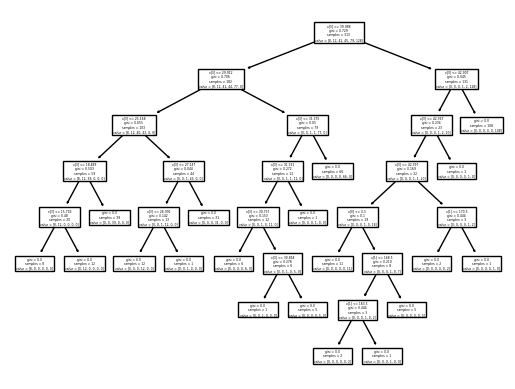

In [37]:
clf.fit(x_train, y_train)
#%%
predicted_value = clf.predict(x_test)
print(predicted_value)
#%%
tree.plot_tree(clf)
zeroes = 0
ones=0


In [38]:
from sklearn.metrics import accuracy_score
hasil2 = accuracy_score(prediksi1,y_test)*100
print('Accuracy Score untuk algoritma Decision Tree : ',accuracy_score(prediksi1,y_test)*100,'%')

Accuracy Score untuk algoritma Decision Tree :  96.20253164556962 %


In [39]:
from sklearn.metrics import classification_report, confusion_matrix
accuracy = accuracy_score(y_test, prediksi1)
classification_rep = classification_report(y_test, prediksi1)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9620253164556962
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       1.00      1.00      1.00         6
           2       0.89      0.80      0.84        10
           3       0.92      1.00      0.96        11
           4       0.95      1.00      0.97        19
           5       1.00      1.00      1.00        29

    accuracy                           0.96        79
   macro avg       0.96      0.92      0.94        79
weighted avg       0.96      0.96      0.96        79



LOGISTIC RERESSION

In [40]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [41]:
scores3 = cross_val_score(classifier, x, y, cv=kf)
print(scores3)
print('rata rata KFold nya adalah: ',scores3.mean())

[0.9        0.825      0.92307692 0.94871795 0.87179487 1.
 0.94871795 0.94871795 0.94871795 0.92307692]
rata rata KFold nya adalah:  0.9237820512820513


In [42]:
y_predlog = classifier.predict(x_test)
y_predlog

array([5, 4, 4, 5, 5, 3, 0, 1, 3, 5, 5, 5, 5, 3, 2, 5, 2, 4, 1, 5, 4, 2,
       3, 4, 4, 5, 4, 1, 4, 3, 4, 5, 5, 4, 5, 5, 4, 5, 2, 5, 5, 3, 3, 2,
       2, 4, 3, 4, 4, 5, 4, 5, 5, 5, 4, 5, 0, 3, 2, 5, 0, 3, 3, 5, 5, 5,
       4, 0, 1, 4, 4, 3, 5, 4, 1, 0, 5, 2, 5], dtype=int64)

In [43]:
accuracylog = accuracy_score(y_test, y_predlog)
hasil3 = accuracylog * 100
print('Akurasi menggunkan algoritma logistic Regression adalah :', (accuracylog)*100,'%')

Akurasi menggunkan algoritma logistic Regression adalah : 92.40506329113924 %


In [44]:
from sklearn.metrics import classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_predlog)
classification_rep = classification_report(y_test, y_predlog)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9240506329113924
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.80      0.67      0.73         6
           2       0.88      0.70      0.78        10
           3       0.92      1.00      0.96        11
           4       0.95      1.00      0.97        19
           5       1.00      1.00      1.00        29

    accuracy                           0.92        79
   macro avg       0.86      0.85      0.85        79
weighted avg       0.93      0.92      0.92        79



NAIVE BAYES

In [45]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
y_prednaive = nb.predict(x_test)
y_prednaive

array([5, 4, 4, 5, 5, 3, 0, 1, 3, 5, 5, 5, 5, 3, 2, 5, 2, 4, 1, 5, 4, 2,
       3, 4, 4, 5, 4, 1, 4, 3, 4, 5, 5, 4, 5, 5, 4, 5, 2, 5, 5, 3, 3, 2,
       2, 4, 3, 4, 4, 5, 4, 5, 5, 5, 4, 5, 1, 2, 2, 5, 0, 3, 3, 5, 5, 5,
       4, 0, 1, 4, 4, 3, 5, 4, 1, 1, 5, 3, 5], dtype=int64)

In [46]:
scores4 = cross_val_score(nb, x, y, cv=kf)
print(scores4)
print('rata rata KFold nya adalah: ',scores4.mean())

[0.9        0.95       0.92307692 0.87179487 0.8974359  0.79487179
 0.92307692 0.8974359  0.8974359  0.92307692]
rata rata KFold nya adalah:  0.8978205128205129


In [47]:
accuracynavie = accuracy_score(y_test, y_prednaive)
hasil4 = accuracynavie * 100
print("Akurasi menggunakan algoritma naive bayes :", (accuracynavie)*100,'%')


Akurasi menggunakan algoritma naive bayes : 92.40506329113924 %


In [48]:
from sklearn.metrics import classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_prednaive)
classification_rep = classification_report(y_test, y_prednaive)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9240506329113924
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6
           2       0.75      0.60      0.67        10
           3       0.83      0.91      0.87        11
           4       0.95      1.00      0.97        19
           5       1.00      1.00      1.00        29

    accuracy                           0.92        79
   macro avg       0.90      0.88      0.88        79
weighted avg       0.92      0.92      0.92        79



KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_predknn = knn.predict(x_test)
y_predknn

array([5, 5, 4, 5, 5, 3, 0, 1, 2, 5, 5, 5, 5, 3, 2, 5, 2, 4, 1, 5, 4, 1,
       3, 4, 4, 5, 4, 1, 4, 2, 5, 5, 4, 4, 5, 5, 3, 5, 2, 5, 5, 3, 3, 2,
       2, 4, 3, 4, 4, 5, 4, 5, 5, 5, 4, 5, 1, 2, 1, 5, 0, 3, 2, 5, 5, 5,
       4, 0, 1, 4, 4, 3, 5, 4, 1, 2, 5, 3, 5], dtype=int64)

In [50]:
scores5 = cross_val_score(knn, x, y, cv=kf)
print(scores5)
print('rata rata KFold nya adalah: ',scores5.mean())

[0.9        0.9        0.79487179 0.87179487 0.92307692 0.87179487
 0.8974359  0.84615385 0.94871795 0.92307692]
rata rata KFold nya adalah:  0.8876923076923078


In [51]:
accuracyknn = accuracy_score(y_test, y_predknn)
hasil5 = accuracyknn * 100
print('akurasi untuk penggunaan algoritma KNN adalah :',(accuracyknn)*100,'%')

akurasi untuk penggunaan algoritma KNN adalah : 79.74683544303798 %


In [52]:
from sklearn.metrics import classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_predknn)
classification_rep = classification_report(y_test, y_predknn)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.7974683544303798
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.62      0.83      0.71         6
           2       0.40      0.40      0.40        10
           3       0.70      0.64      0.67        11
           4       0.89      0.84      0.86        19
           5       0.93      0.97      0.95        29

    accuracy                           0.80        79
   macro avg       0.76      0.74      0.74        79
weighted avg       0.80      0.80      0.80        79



LINEAR DESCRIMINANT ANALYSIS

In [53]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
y_predLDA = lda.predict(x_test)
accuracyLDA = accuracy_score(y_test, y_predLDA)
y_predLDA

array([5, 4, 4, 5, 4, 3, 1, 1, 2, 5, 4, 5, 5, 2, 2, 5, 1, 4, 1, 5, 4, 2,
       3, 4, 4, 5, 4, 1, 4, 3, 5, 5, 5, 4, 5, 5, 3, 5, 3, 5, 5, 3, 3, 2,
       2, 4, 3, 4, 4, 4, 4, 4, 5, 5, 4, 5, 1, 4, 1, 5, 0, 4, 2, 5, 5, 5,
       4, 1, 2, 4, 4, 3, 5, 4, 0, 2, 5, 2, 5], dtype=int64)

In [54]:
scores6 = cross_val_score(lda, x, y, cv=kf)
print(scores6)
print('rata rata KFold nya adalah: ',scores6.mean())

[0.75       0.875      0.84615385 0.84615385 0.84615385 0.76923077
 0.79487179 0.79487179 0.69230769 0.71794872]
rata rata KFold nya adalah:  0.7932692307692308


In [55]:
hasil6 = accuracyLDA * 100
print("Akurasi untuk penggunaan algoritma Linear Discriminant Analysis:", (accuracyLDA)*100,'%')

Akurasi untuk penggunaan algoritma Linear Discriminant Analysis: 70.88607594936708 %


In [56]:
from sklearn.metrics import classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_predLDA)
classification_rep = classification_report(y_test, y_predLDA)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.7088607594936709
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.38      0.50      0.43         6
           2       0.40      0.40      0.40        10
           3       0.67      0.55      0.60        11
           4       0.71      0.89      0.79        19
           5       0.96      0.86      0.91        29

    accuracy                           0.71        79
   macro avg       0.60      0.58      0.58        79
weighted avg       0.72      0.71      0.71        79



EXTRA TRESS CLASIFIER

In [57]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=100, random_state=0)
model.fit(x_train, y_train)
y_predETC = model.predict(x_test)
accuracyETC = accuracy_score(y_test, y_predETC)
y_predETC

array([5, 4, 4, 5, 5, 3, 0, 1, 2, 5, 5, 5, 5, 3, 2, 5, 2, 4, 1, 5, 4, 2,
       2, 4, 4, 4, 4, 1, 4, 3, 5, 5, 5, 4, 5, 5, 4, 5, 2, 5, 5, 3, 3, 2,
       2, 4, 3, 4, 4, 5, 4, 5, 5, 5, 4, 5, 1, 3, 1, 5, 0, 3, 3, 5, 5, 5,
       4, 0, 1, 4, 4, 3, 5, 4, 1, 1, 5, 3, 5], dtype=int64)

In [58]:
scores7 = cross_val_score(model, x, y, cv=kf)
print(scores7)
print('rata rata nya adalah: ',scores7.mean())

[0.975      0.925      0.92307692 0.8974359  0.94871795 0.84615385
 0.97435897 0.97435897 0.87179487 1.        ]
rata rata nya adalah:  0.9335897435897437


In [59]:
hasil7 = accuracyETC * 100
print("Akurasi untuk penggunaan algoritma ExtraTreesClassifier :", (accuracyETC)*100,'%')

Akurasi untuk penggunaan algoritma ExtraTreesClassifier : 89.87341772151899 %


In [60]:
from sklearn.metrics import classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_predETC)
classification_rep = classification_report(y_test, y_predETC)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.8987341772151899
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.75      1.00      0.86         6
           2       0.75      0.60      0.67        10
           3       0.91      0.91      0.91        11
           4       0.90      0.95      0.92        19
           5       0.97      0.97      0.97        29

    accuracy                           0.90        79
   macro avg       0.88      0.86      0.86        79
weighted avg       0.90      0.90      0.90        79



ALGORITMA XGBOOST

In [61]:
import xgboost
from xgboost import XGBClassifier
modelXG = XGBClassifier()
modelXG.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [62]:
scores8 = cross_val_score(modelXG, x, y, cv=kf)
print(scores8)
print('rata rata Xgboost adalah: ',scores8.mean())

[0.925      0.925      0.8974359  0.92307692 0.97435897 0.97435897
 0.92307692 0.97435897 0.94871795 0.97435897]
rata rata Xgboost adalah:  0.9439743589743589


In [63]:
y_predXG = modelXG.predict(x_test)
y_predXG

array([5, 4, 4, 5, 5, 3, 0, 1, 3, 5, 5, 5, 5, 3, 2, 5, 2, 4, 1, 5, 4, 2,
       3, 4, 4, 5, 4, 1, 4, 3, 4, 5, 5, 4, 5, 5, 4, 5, 2, 5, 5, 3, 3, 2,
       2, 4, 3, 4, 4, 5, 4, 5, 5, 5, 4, 5, 1, 3, 1, 5, 0, 3, 3, 5, 5, 5,
       4, 0, 1, 4, 4, 3, 5, 4, 0, 1, 5, 3, 5], dtype=int64)

In [64]:
accuracyXGB= accuracy_score(y_test, y_predXG)
hasil8 = accuracyXGB * 100
print("Akurasi untuk penggunaan algoritma ExtraGradientBoosting :", (accuracyXGB)*100,'%')

Akurasi untuk penggunaan algoritma ExtraGradientBoosting : 91.13924050632912 %


SVM (Support Vector Machine)

In [65]:
from sklearn.svm import SVC
modelSVM = SVC(kernel = "linear")
modelSVM.fit(x_train, y_train)

SVC(kernel='linear')

In [66]:
scores9 = cross_val_score(modelSVM, x, y, cv=kf)
print(scores9)
print('rata rata SVM adalah: ',scores9.mean())

[0.95       0.875      1.         0.97435897 0.94871795 0.8974359
 1.         0.92307692 0.94871795 0.92307692]
rata rata SVM adalah:  0.9440384615384616


In [67]:
y_predSVM = modelSVM.predict(x_test)
y_predSVM

array([5, 4, 4, 5, 5, 3, 0, 1, 3, 5, 5, 5, 5, 3, 2, 5, 2, 4, 1, 5, 4, 2,
       3, 4, 4, 5, 4, 1, 4, 3, 4, 5, 5, 4, 5, 5, 4, 5, 2, 5, 5, 3, 3, 2,
       2, 4, 3, 4, 4, 5, 4, 5, 5, 5, 4, 5, 0, 3, 2, 5, 0, 4, 3, 5, 5, 5,
       4, 0, 1, 4, 4, 3, 5, 4, 1, 0, 5, 3, 5], dtype=int64)

In [68]:
accuracySVM= accuracy_score(y_test, y_predSVM)
hasil9 = accuracySVM * 100
print("Akurasi untuk penggunaan algoritma SVM :", (accuracySVM)*100,'%')

Akurasi untuk penggunaan algoritma SVM : 89.87341772151899 %


HASIL KESELURUHAN DARI SEMUA SEVEN FOLD CROSS VALIDATON

In [69]:
print('rata rata random forest adalah: ',scores1.mean())
print('rata rata decision tree adalah: ',scores2.mean())
print('rata rata logistic regression adalah: ',scores3.mean())
print('rata rata naive bayes adalah: ',scores4.mean())
print('rata rata KNN adalah: ',scores5.mean())
print('rata rata Linear Discriminant Analysis adalah: ',scores6.mean())
print('rata rata ExtraTreesClassifier adalah: ',scores7.mean())
print('rata rata Extra Gradient Boosting adalah: ',scores8.mean())
print('rata rata SVM adalah: ',scores9.mean())
print('=='*40)
print('rata rata tertinggi dari CROSS FOLD VALIDATON didapatkan oleh algoritma Random Forest: ',scores1.mean())

rata rata random forest adalah:  0.9566326530612244
rata rata decision tree adalah:  0.9412179487179488
rata rata logistic regression adalah:  0.9237820512820513
rata rata naive bayes adalah:  0.8978205128205129
rata rata KNN adalah:  0.8876923076923078
rata rata Linear Discriminant Analysis adalah:  0.7932692307692308
rata rata ExtraTreesClassifier adalah:  0.9335897435897437
rata rata Extra Gradient Boosting adalah:  0.9439743589743589
rata rata SVM adalah:  0.9440384615384616
rata rata tertinggi dari CROSS FOLD VALIDATON didapatkan oleh algoritma Random Forest:  0.9566326530612244


HASIL KESELURUHAN DARI ALGORITMA YANG TELAH DICOBA 

In [70]:
#kesimpulan dari beberapa algoritma pengukuran yang telah dilakukan
print('Accuracy Score untuk algoritma Random Forest Adalah : ',accuracy_score(prediksi_model,y_test)*100,'%')
print('Accuracy Score untuk algoritma Decision Tree : ',accuracy_score(prediksi1,y_test)*100,'%')
print('Akurasi menggunkan algoritma logistic Regression adalah :', (accuracylog)*100,'%')
print("Akurasi menggunakan algoritma naive bayes :", (accuracynavie)*100,'%')
print('akurasi untuk penggunaan algoritma KNN adalah :',(accuracyknn)*100,'%')
print("Akurasi untuk penggunaan algoritma Linear Discriminant Analysis:", (accuracyLDA)*100,'%')
print("Akurasi untuk penggunaan algoritma ExtraTreesClassifier :", (accuracyETC)*100,'%')
print("Akurasi untuk penggunaan algoritma ExtraGradientBoosting :", (accuracyXGB)*100,'%')
print("Akurasi untuk penggunaan algoritma SVM :", (accuracySVM)*100,'%')
print('=='*40)
print('JADI ALGORITMA YANG COCOK UNTUK KARAKTERISTIK DATASET INI ADALAH ALGORITMA DECISION TREE DENGAN AKURASI SEBESAR: ',accuracy_score(prediksi1,y_test)*100,'%')

Accuracy Score untuk algoritma Random Forest Adalah :  94.9367088607595 %
Accuracy Score untuk algoritma Decision Tree :  96.20253164556962 %
Akurasi menggunkan algoritma logistic Regression adalah : 92.40506329113924 %
Akurasi menggunakan algoritma naive bayes : 92.40506329113924 %
akurasi untuk penggunaan algoritma KNN adalah : 79.74683544303798 %
Akurasi untuk penggunaan algoritma Linear Discriminant Analysis: 70.88607594936708 %
Akurasi untuk penggunaan algoritma ExtraTreesClassifier : 89.87341772151899 %
Akurasi untuk penggunaan algoritma ExtraGradientBoosting : 91.13924050632912 %
Akurasi untuk penggunaan algoritma SVM : 89.87341772151899 %
JADI ALGORITMA YANG COCOK UNTUK KARAKTERISTIK DATASET INI ADALAH ALGORITMA DECISION TREE DENGAN AKURASI SEBESAR:  96.20253164556962 %


In [71]:
df_hasil_model = pd.DataFrame({"Model" : ["Random Forest", "Decision Tree", "logistic Regression", "naive bayes", "KNN", "Linear Discriminant Analysis","ExtraTreesClassifier","ExtraGradientBoosting","SVM"],
                         "Akurasi" : [hasil1, hasil2, hasil3, hasil4, hasil5, hasil6, hasil7, hasil8, hasil9]})
df_hasil_model

,Model,Akurasi
0,Random Forest,94.936709
1,Decision Tree,96.202532
2,logistic Regression,92.405063
3,naive bayes,92.405063
4,KNN,79.746835
5,Linear Discriminant Analysis,70.886076
6,ExtraTreesClassifier,89.873418
7,ExtraGradientBoosting,91.139241
8,SVM,89.873418


In [72]:
jawaban = pd.DataFrame({'Jawaban Asli':(y_test).reset_index(drop=True)})
jawaban

,Jawaban Asli
0,5
1,4
2,4
3,5
4,5
...,...
74,1
75,1
76,5
77,2


In [73]:
pred_RandomForest = pd.DataFrame({'Pred Random Forest':(prediksi_model)})
pred_RandomForest

,Pred Random Forest
0,5
1,4
2,4
3,5
4,5
...,...
74,1
75,1
76,5
77,2


In [74]:
pred_decisiontree = pd.DataFrame({'Pred Decision Tree':(prediksi1)})
pred_decisiontree

,Pred Decision Tree
0,5
1,4
2,4
3,5
4,5
...,...
74,1
75,1
76,5
77,2


In [75]:
df_result=pd.concat([jawaban,pred_RandomForest,pred_decisiontree], axis=1)
df_result


,Jawaban Asli,Pred Random Forest,Pred Decision Tree
0,5,5,5
1,4,4,4
2,4,4,4
3,5,5,5
4,5,5,5
...,...,...,...
74,1,1,1
75,1,1,1
76,5,5,5
77,2,2,2


In [76]:
df_result['Jawaban Asli'] = df_result['Jawaban Asli'].replace(0,'Extremely Weak')
df_result['Jawaban Asli'] = df_result['Jawaban Asli'].replace(1,'Weak')
df_result['Jawaban Asli'] = df_result['Jawaban Asli'].replace(2,'Normal')
df_result['Jawaban Asli'] = df_result['Jawaban Asli'].replace(3,'Overweight')
df_result['Jawaban Asli'] = df_result['Jawaban Asli'].replace(4,'Obesity')
df_result['Jawaban Asli'] = df_result['Jawaban Asli'].replace(5,'Extreme Obesity')


df_result['Pred Random Forest'] = df_result['Pred Random Forest'].replace(0,'Extremely Weak')
df_result['Pred Random Forest'] = df_result['Pred Random Forest'].replace(1,'Weak')
df_result['Pred Random Forest'] = df_result['Pred Random Forest'].replace(2,'Normal')
df_result['Pred Random Forest'] = df_result['Pred Random Forest'].replace(3,'Overweight')
df_result['Pred Random Forest'] = df_result['Pred Random Forest'].replace(4,'Obesity')
df_result['Pred Random Forest'] = df_result['Pred Random Forest'].replace(5,'Extreme Obesity')

df_result['Pred Decision Tree'] = df_result['Pred Decision Tree'].replace(0,'Extremely Weak')
df_result['Pred Decision Tree'] = df_result['Pred Decision Tree'].replace(1,'Weak')
df_result['Pred Decision Tree'] = df_result['Pred Decision Tree'].replace(2,'Normal')
df_result['Pred Decision Tree'] = df_result['Pred Decision Tree'].replace(3,'Overweight')
df_result['Pred Decision Tree'] = df_result['Pred Decision Tree'].replace(4,'Obesity')
df_result['Pred Decision Tree'] = df_result['Pred Decision Tree'].replace(5,'Extreme Obesity')

df_result

,Jawaban Asli,Pred Random Forest,Pred Decision Tree
0,Extreme Obesity,Extreme Obesity,Extreme Obesity
1,Obesity,Obesity,Obesity
2,Obesity,Obesity,Obesity
3,Extreme Obesity,Extreme Obesity,Extreme Obesity
4,Extreme Obesity,Extreme Obesity,Extreme Obesity
...,...,...,...
74,Weak,Weak,Weak
75,Weak,Weak,Weak
76,Extreme Obesity,Extreme Obesity,Extreme Obesity
77,Normal,Normal,Normal


HASIL AKHIR

In [77]:
import plotly.express as px
fig=px.line(df_result[['Jawaban Asli','Pred Random Forest']])
fig.show()

In [78]:
import plotly.express as px
fig=px.line(df_result[['Jawaban Asli','Pred Decision Tree']])
fig.show()

In [79]:
# import joblib
# joblib.dump(model, "Model-BMI-RandomForest.pkl")

In [80]:
# import joblib
# joblib.dump(clf, "Model-BMi-DecisionTree.pkl")